#### 그래프 그리기 연습!

<function matplotlib.pyplot.show(close=None, block=None)>

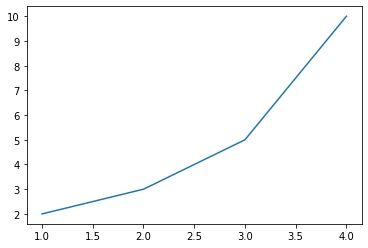

In [4]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4],[2,3,5,10])
plt.show()

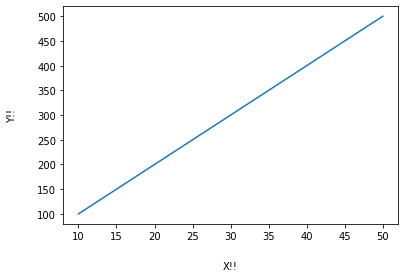

In [5]:
data_1={'data_x':[10,20,30,40,50],'data_y': [100,200,300,400,500]}
#그래프 숫자와 레이블 사이의 여백을 주는 방법
plt.plot('data_x','data_y',data=data_1)
plt.xlabel('X!!',labelpad=20)
plt.ylabel('Y!!',labelpad=20)
plt.show()

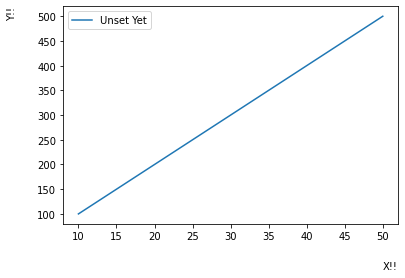

In [6]:
data_1={'data_x':[10,20,30,40,50],'data_y': [100,200,300,400,500]}
#그래프 레이블의 위치 지정/ legend 저장까지
plt.plot('data_x','data_y',data=data_1, label='Unset Yet')#여기서의 레이블른 레전드 이름
plt.xlabel('X!!',labelpad=20,loc='right')
plt.ylabel('Y!!',labelpad=20,loc='top')
plt.legend() #표시해주는 함수
plt.show()

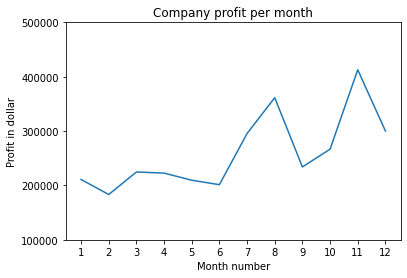

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("D:\company_sales_data.csv") #csv 파일 read하면서 파일가 연결
profit=data ['total_profit'].tolist() #total_profit을 출력하면 원래 한 줄에 한 데이터씩인데/ tolist 이용시 한줄로 출력된다.
month=data ['month_number'].tolist()
plt.plot(month,profit,label='Profie per month') #가로,세로,label은 plt.legend() 치면 열림
plt.xlabel('Month number') #x축 이름
plt.ylabel('Profit in dollar') #y축 이름
plt.xticks(month) #점찍어주는건데 month가 12니까 하나씩 찍히게
plt.title('Company profit per month')
plt.yticks([100000,200000,300000,400000,500000]) #이런 형태로 줄 수도 있음
plt.show()



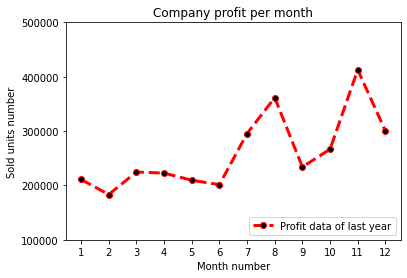

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("D:\company_sales_data.csv") 
profit=data ['total_profit'].tolist() 
month=data ['month_number'].tolist()
plt.plot(month,profit,label='Profit data of last year', color='r',marker='o',markerfacecolor='k',linestyle='--',linewidth=3)
#(가로,세로,legend 이름, 컬러, 라인 컬러: 빨간, marker 형태:o, 마커색=k색, 라인 스타일, -하고 - 사이의 폭
plt.xlabel('Month number') 
plt.ylabel('Sold units number') 
plt.xticks(month) 
plt.title('Company profit per month')
plt.yticks([100000,200000,300000,400000,500000])
plt.legend(loc='lower right')
plt.show()

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("D:\company_sales_data.csv") #데이터를 for문으로 입력받아 각각으로 바인딩 해보기 but 실패 -> 질문하기
data_df=pd.DataFrame(data)

# face_cream=data['facecream'].tolist()
# face_wash=data['facewash'].tolist()
list=[]
for x in data_df:
    list.append(data[x].tolist())
data.head()
print(list)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [2500, 2630, 2140, 3400, 3600, 2760, 2980, 3700, 3540, 1990, 2340, 2900], [1500, 1200, 1340, 1130, 1740, 1555, 1120, 1400, 1780, 1890, 2100, 1760], [5200, 5100, 4550, 5870, 4560, 4890, 4780, 5860, 6100, 8300, 7300, 7400], [9200, 6100, 9550, 8870, 7760, 7490, 8980, 9960, 8100, 10300, 13300, 14400], [1200, 2100, 3550, 1870, 1560, 1890, 1780, 2860, 2100, 2300, 2400, 1800], [1500, 1200, 1340, 1130, 1740, 1555, 1120, 1400, 1780, 1890, 2100, 1760], [21100, 18330, 22470, 22270, 20960, 20140, 29550, 36140, 23400, 26670, 41280, 30020], [211000, 183300, 224700, 222700, 209600, 201400, 295500, 361400, 234000, 266700, 412800, 300200]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("D:\company_sales_data.csv")
monthlist=data['month_number'].tolist()
facecream=data['facecream'].tolisit()
facewash=data['facewash'].tolist()
toothpaste=data['toothpaste'].tolist()
bathingsoap=data['bathingsoap'].tolisit()
shampoo=data['shampoo'].tolisit()
moisture=data['moisturizer'].tolist()

# import pandas as pd ################## 질문 ::: 이거 for 문으로 안될까??????/
# import matplotlib.pyplot as plt  

# df = pd.read_csv("D:\\Python\\Articles\\matplotlib\\sales_data.csv")
# monthList  = df ['month_number'].tolist()
# faceCremSalesData   = df ['facecream'].tolist()
# faceWashSalesData   = df ['facewash'].tolist()
# toothPasteSalesData = df ['toothpaste'].tolist()
# bathingsoapSalesData   = df ['bathingsoap'].tolist()
# shampooSalesData   = df ['shampoo'].tolist()
# moisturizerSalesData = df ['moisturizer'].tolist()

# plt.plot(monthList, faceCremSalesData,   label = 'Face cream Sales Data', marker='o', linewidth=3)
# plt.plot(monthList, faceWashSalesData,   label = 'Face Wash Sales Data',  marker='o', linewidth=3)
# plt.plot(monthList, toothPasteSalesData, label = 'ToothPaste Sales Data', marker='o', linewidth=3)
# plt.plot(monthList, bathingsoapSalesData, label = 'ToothPaste Sales Data', marker='o', linewidth=3)
# plt.plot(monthList, shampooSalesData, label = 'ToothPaste Sales Data', marker='o', linewidth=3)
# plt.plot(monthList, moisturizerSalesData, label = 'ToothPaste Sales Data', marker='o', linewidth=3)

# plt.xlabel('Month Number')
# plt.ylabel('Sales units in number')
# plt.legend(loc='upper left')
# plt.xticks(monthList)
# plt.yticks([1000, 2000, 4000, 6000, 8000, 10000, 12000, 15000, 18000])
# plt.title('Sales data')
# plt.show()